In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("..\data\questionario_construtos.csv", delimiter=";")
df.head()

,OMI,OME,VAT,CAP,AEA,ATE,MRE,ELA,ORG,PCR,ARE,TAE,RES
0,4.5,4.5,5.17,3.00,4.75,2.6,3.2,4.0,3.00,5.0,5.0,4.0,4.6
1,4.5,4.0,4.83,4.67,4.50,5.0,5.2,6.0,6.67,7.0,3.8,5.0,4.6
2,7.0,3.5,6.17,6.33,6.75,3.4,6.8,7.0,6.33,7.0,6.6,7.0,6.4
3,5.5,5.5,6.17,4.67,5.50,4.0,5.2,6.5,4.67,7.0,5.0,6.0,5.8
4,6.0,7.0,7.00,5.00,7.00,3.8,4.6,7.0,6.33,7.0,6.4,5.0,7.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OMI     43 non-null     float64
 1   OME     43 non-null     float64
 2   VAT     43 non-null     float64
 3   CAP     43 non-null     float64
 4   AEA     43 non-null     float64
 5   ATE     43 non-null     float64
 6   MRE     43 non-null     float64
 7   ELA     43 non-null     float64
 8   ORG     43 non-null     float64
 9   PCR     43 non-null     float64
 10  ARE     43 non-null     float64
 11  TAE     43 non-null     float64
 12  RES     43 non-null     float64
dtypes: float64(13)
memory usage: 4.5 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OMI,43.0,5.790698,1.092357,2.50,5.000,6.00,6.500,7.0
OME,43.0,4.988372,1.347345,1.00,4.000,5.50,5.750,7.0
VAT,43.0,6.279535,0.743246,4.67,5.830,6.50,7.000,7.0
CAP,43.0,4.690000,1.277410,1.00,4.330,5.00,5.500,7.0
AEA,43.0,6.162791,0.876077,3.75,5.625,6.50,6.875,7.0
ATE,43.0,4.116279,1.176138,1.60,3.000,4.20,5.000,6.0
MRE,43.0,5.144186,1.280867,2.80,4.100,5.20,6.100,7.0
ELA,43.0,6.290698,0.901273,4.00,6.000,6.50,7.000,7.0
ORG,43.0,5.279070,1.168212,2.67,4.670,5.33,6.000,7.0
PCR,43.0,6.023256,1.422412,2.00,5.500,7.00,7.000,7.0


In [5]:
df.columns

Index(['OMI', 'OME', 'VAT', 'CAP', 'AEA', 'ATE', 'MRE', 'ELA', 'ORG', 'PCR',
       'ARE', 'TAE', 'RES'],
      dtype='object')

In [6]:
df.corr()

,OMI,OME,VAT,CAP,AEA,ATE,MRE,ELA,ORG,PCR,ARE,TAE,RES
OMI,1.000000,0.515982,0.532585,0.441420,0.534044,0.067578,0.285845,0.129779,0.304435,0.409282,0.392627,0.308556,0.447602
OME,0.515982,1.000000,0.602836,0.666720,0.521048,0.137601,0.224497,0.213627,0.145590,0.174075,0.319806,0.173453,0.211427
VAT,0.532585,0.602836,1.000000,0.562300,0.838483,0.120015,0.296691,0.548645,0.224129,0.319813,0.585579,0.239446,0.531501
CAP,0.441420,0.666720,0.562300,1.000000,0.578000,0.157588,0.385506,0.310830,0.167244,0.169824,0.336962,0.294753,0.265115
AEA,0.534044,0.521048,0.838483,0.578000,1.000000,-0.004944,0.241688,0.500267,0.281880,0.364691,0.474329,0.290804,0.605011
ATE,0.067578,0.137601,0.120015,0.157588,-0.004944,1.000000,0.329357,0.286304,0.380415,0.300064,0.125854,0.170462,-0.006154
MRE,0.285845,0.224497,0.296691,0.385506,0.241688,0.329357,1.000000,0.373262,0.212390,0.387553,0.522946,0.789731,0.380068
ELA,0.129779,0.213627,0.548645,0.310830,0.500267,0.286304,0.373262,1.000000,0.546612,0.496057,0.445741,0.204839,0.525790
ORG,0.304435,0.145590,0.224129,0.167244,0.281880,0.380415,0.212390,0.546612,1.000000,0.588346,0.118262,0.194070,0.248082
PCR,0.409282,0.174075,0.319813,0.169824,0.364691,0.300064,0.387553,0.496057,0.588346,1.000000,0.348656,0.413336,0.502971


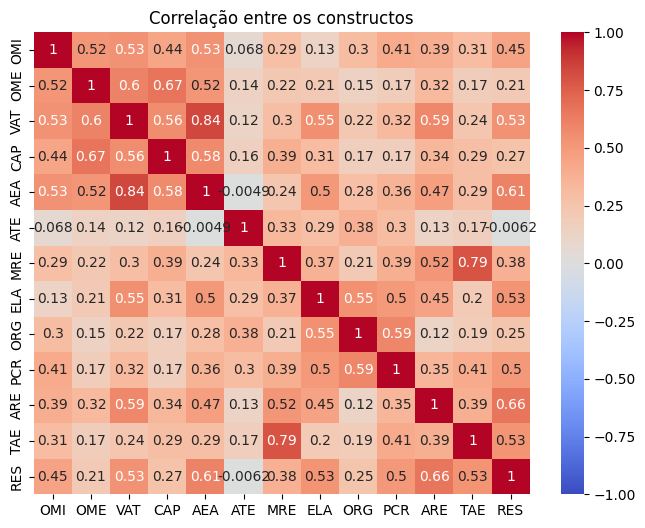

In [7]:
correlacao = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre os constructos')
plt.show()

In [8]:
colunas = ['AEA','VAT', 'TAE', 'MRE']
df[colunas].corr()

,AEA,VAT,TAE,MRE
AEA,1.000000,0.838483,0.290804,0.241688
VAT,0.838483,1.000000,0.239446,0.296691
TAE,0.290804,0.239446,1.000000,0.789731
MRE,0.241688,0.296691,0.789731,1.000000


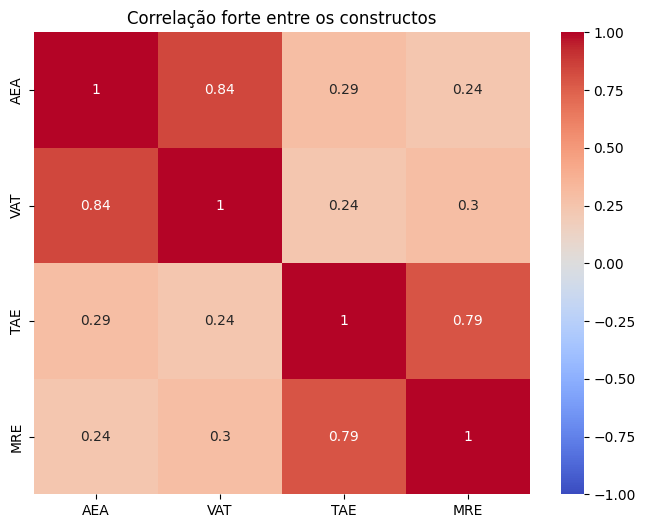

In [9]:
colunas = ['AEA','VAT', 'TAE', 'MRE']
correlacao = df[colunas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação forte entre os constructos')
plt.show()

In [10]:
# médias
medias = df.iloc[:,:].mean()
medias.sort_index()
medias

OMI    5.790698
OME    4.988372
VAT    6.279535
CAP    4.690000
AEA    6.162791
ATE    4.116279
MRE    5.144186
ELA    6.290698
ORG    5.279070
PCR    6.023256
ARE    5.283721
TAE    4.860465
RES    5.697674
dtype: float64

In [11]:
# desvio padrao
stds = df.iloc[:,:].std()
stds.sort_index()
stds

OMI    1.092357
OME    1.347345
VAT    0.743246
CAP    1.277410
AEA    0.876077
ATE    1.176138
MRE    1.280867
ELA    0.901273
ORG    1.168212
PCR    1.422412
ARE    1.052193
TAE    2.030498
RES    0.948555
dtype: float64

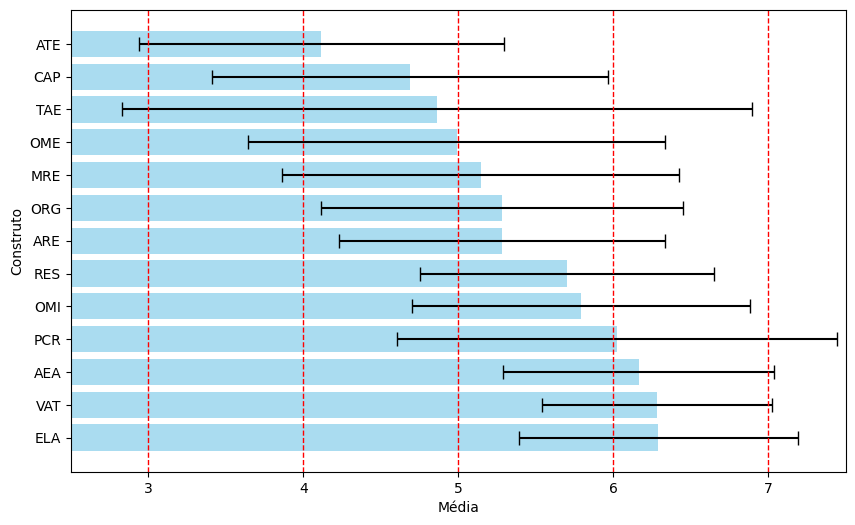

In [12]:
data = {
    'Categoria': medias.index,
    'Valores': medias,
    'Desvio_Padrao': stds
}
df_agrupado = pd.DataFrame(data)

# Ordenar o DataFrame pelo valor
df_sorted = df_agrupado.sort_values(by='Valores', ascending=True)

# Configurando os dados a partir do DataFrame ordenado
categorias = df_sorted['Categoria']
valores = df_sorted['Valores']
desvios_padrao = df_sorted['Desvio_Padrao']

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(categorias, valores, xerr=desvios_padrao, capsize=5, color='skyblue', alpha=0.7)

plt.ylabel('Construto')
plt.xlabel('Média')
#plt.title('Perfil de autorregulação da amostra com Desvio Padrão (Ordenado)')

plt.xlim(2.5, 7.5)

linhas_verticais = range(2, 8, 1)
for linha in linhas_verticais:
    plt.axvline(x=linha, color='red', linestyle='--', linewidth=1)

plt.gca().invert_yaxis()

plt.show()